In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [3]:
mbti_df=pd.read_csv('../data/MBTI.csv')
mbti_df

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


In [8]:
r_sampled_df = mbti_df.groupby('type', group_keys=False).apply(lambda x: x.sample(n=180, random_state=42))
r_sampled_df['type'].value_counts()
r_sampled_df

,posts,type,ei_type
54944,hug kiss touch etc thing like give gift thing ...,ENFJ,0
53656,thank really hard find decent info sure know f...,ENFJ,0
53896,relate whether good enough meet responsibility...,ENFJ,0
54669,understand tolerance relate others good cognit...,ENFJ,0
54936,true u love take initiative however favor retu...,ENFJ,0
...,...,...,...
52239,screw shady mofos probably seem like lot work ...,ISTP,1
51063,make hate establish order cling exactly happen...,ISTP,1
50236,go back school eventually graduate highly rank...,ISTP,1
51547,problem understand problem mbti everyone go th...,ISTP,1


In [9]:
r_sampled_df['ei_type'].value_counts()

ei_type
0    1440
1    1440
Name: count, dtype: int64

In [10]:
r_sampled_df['posts']=r_sampled_df['posts'].str.replace(' ',',')
r_sampled_df

,posts,type,ei_type
54944,"hug,kiss,touch,etc,thing,like,give,gift,thing,...",ENFJ,0
53656,"thank,really,hard,find,decent,info,sure,know,f...",ENFJ,0
53896,"relate,whether,good,enough,meet,responsibility...",ENFJ,0
54669,"understand,tolerance,relate,others,good,cognit...",ENFJ,0
54936,"true,u,love,take,initiative,however,favor,retu...",ENFJ,0
...,...,...,...
52239,"screw,shady,mofos,probably,seem,like,lot,work,...",ISTP,1
51063,"make,hate,establish,order,cling,exactly,happen...",ISTP,1
50236,"go,back,school,eventually,graduate,highly,rank...",ISTP,1
51547,"problem,understand,problem,mbti,everyone,go,th...",ISTP,1


In [11]:
i_df=r_sampled_df[r_sampled_df['ei_type']==1]
i_df

,posts,type,ei_type
91639,"option,something,would,frivolously,unless,cour...",INFJ,1
84339,"im,try,make,intention,clear,without,spook,away...",INFJ,1
82029,"get,see,world,way,privilege,price,think,right,...",INFJ,1
88725,"husband,go,cafe,lot,husband,really,band,sort,t...",INFJ,1
93270,"within,dream,october,scar,death,get,ready,go,f...",INFJ,1
...,...,...,...
52239,"screw,shady,mofos,probably,seem,like,lot,work,...",ISTP,1
51063,"make,hate,establish,order,cling,exactly,happen...",ISTP,1
50236,"go,back,school,eventually,graduate,highly,rank...",ISTP,1
51547,"problem,understand,problem,mbti,everyone,go,th...",ISTP,1


In [12]:
i_word_list=i_df['posts'].to_list()

In [13]:
i_dict={}
for word_list in i_word_list:
  for word in word_list.split(','):
    if word in i_dict:
      i_dict[word]+=1
    else:
      i_dict[word]=1

In [26]:
i_word_count=Counter(i_dict)
i_word_count.most_common(5)

[('like', 10178),
 ('think', 8335),
 ('get', 7455),
 ('people', 7451),
 ('thing', 5706)]

In [27]:
len(i_dict)

25504

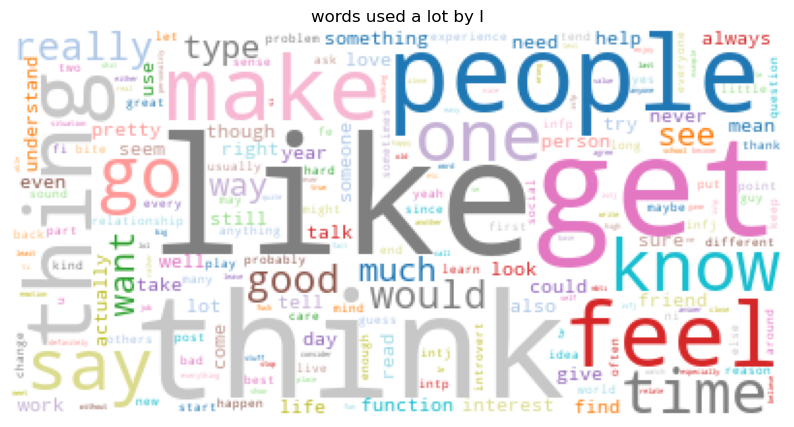

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(background_color='white',colormap='tab20').generate_from_frequencies(i_dict))
plt.title('words used a lot by I')
plt.axis('off')
plt.show()

In [28]:
e_df=r_sampled_df[r_sampled_df['ei_type']==0]

e_word_list=e_df['posts'].to_list()

e_dict={}
for word_list in e_word_list:
  for word in word_list.split(','):
    if word in e_dict:
      e_dict[word]+=1
    else:
      e_dict[word]=1

print(len(e_dict))

30503


In [29]:
e_word_count=Counter(e_dict)
e_word_count.most_common(100)

[('like', 9831),
 ('think', 8244),
 ('get', 7220),
 ('people', 7112),
 ('make', 5399),
 ('know', 5235),
 ('one', 4973),
 ('say', 4904),
 ('thing', 4882),
 ('would', 4751),
 ('feel', 4643),
 ('go', 4559),
 ('really', 4401),
 ('type', 4385),
 ('good', 4342),
 ('time', 4082),
 ('want', 3693),
 ('see', 3461),
 ('way', 3386),
 ('also', 3164),
 ('much', 3044),
 ('take', 2808),
 ('lot', 2690),
 ('friend', 2689),
 ('well', 2683),
 ('work', 2640),
 ('try', 2639),
 ('something', 2575),
 ('find', 2543),
 ('even', 2518),
 ('love', 2460),
 ('use', 2460),
 ('need', 2346),
 ('mean', 2221),
 ('come', 2161),
 ('look', 2096),
 ('someone', 2087),
 ('function', 2079),
 ('though', 2078),
 ('talk', 2042),
 ('could', 2040),
 ('seem', 1936),
 ('always', 1893),
 ('person', 1862),
 ('life', 1842),
 ('actually', 1840),
 ('right', 1790),
 ('give', 1789),
 ('u', 1739),
 ('interest', 1714),
 ('pretty', 1676),
 ('never', 1646),
 ('tell', 1635),
 ('fe', 1611),
 ('sure', 1597),
 ('understand', 1591),
 ('still', 1578),

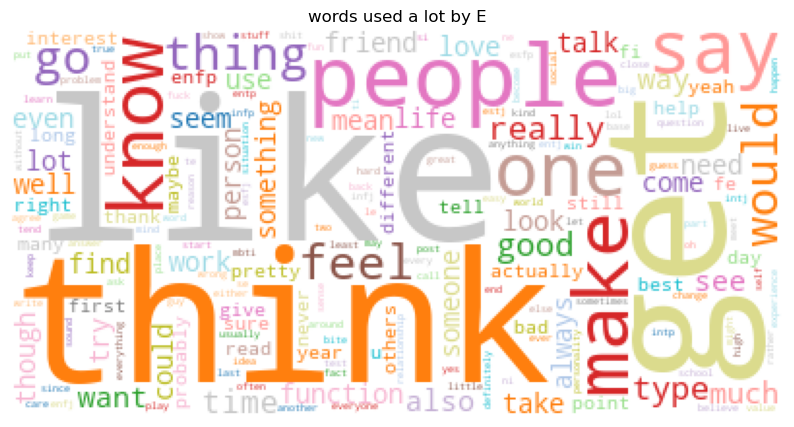

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(background_color='white',colormap='tab20').generate_from_frequencies(e_dict))
plt.title('words used a lot by E')
plt.axis('off')
plt.show()

In [33]:
only_i=set(i_dict.keys())-set(e_dict.keys())
only_i

{'dispises',
 'terraforming',
 'convolve',
 'afore',
 'meming',
 'jacob',
 'handmaiden',
 'trapt',
 'oir',
 '是',
 'subsidy',
 'fisherman',
 'merton',
 'idd',
 'essy',
 'rushmore',
 'emancipator',
 'eamon',
 'liveable',
 'gateau',
 'scullyrick',
 'fern',
 'miserly',
 'pubic',
 'eiei',
 'unconstrained',
 'emetophobic',
 'horcruxes',
 'tinnitus',
 'kamay',
 'morganfreeman',
 'ecology',
 'shoul',
 'chelseafc',
 'nonsexual',
 'wyoming',
 'compulsory',
 'bassnectar',
 'darryl',
 'boatmurdered',
 'geiszler',
 'hijab',
 'ptfo',
 'gano',
 'scalp',
 'possibiy',
 'undeserved',
 'glieck',
 'raylan',
 'clicker',
 'oldmanrivers',
 'brimstone',
 'hobbs',
 'exnocontact',
 'trident',
 'mudvayne',
 'personnal',
 'mulligan',
 'barrely',
 'corpus',
 'starling',
 'delevigne',
 'gamehubbs',
 'epik',
 'amateurish',
 'simile',
 'econ',
 'nontraditionalists',
 'mongolia',
 'snowfall',
 'euphemize',
 'brahms',
 'levoamfetamine',
 'constipation',
 'lovelace',
 'directiom',
 'pentatonix',
 'zootopeia',
 'straight

In [34]:
len(only_i)

10228

In [43]:
only_i_count={}
for word in only_i:
  only_i_count[word]=i_dict[word]

only_i_count

{'dispises': 1,
 'terraforming': 1,
 'convolve': 1,
 'afore': 1,
 'meming': 1,
 'jacob': 4,
 'handmaiden': 1,
 'trapt': 2,
 'oir': 1,
 '是': 1,
 'subsidy': 2,
 'fisherman': 1,
 'merton': 1,
 'idd': 2,
 'essy': 1,
 'rushmore': 1,
 'emancipator': 1,
 'eamon': 2,
 'liveable': 1,
 'gateau': 1,
 'scullyrick': 1,
 'fern': 1,
 'miserly': 1,
 'pubic': 1,
 'eiei': 2,
 'unconstrained': 1,
 'emetophobic': 1,
 'horcruxes': 1,
 'tinnitus': 3,
 'kamay': 1,
 'morganfreeman': 1,
 'ecology': 2,
 'shoul': 1,
 'chelseafc': 1,
 'nonsexual': 1,
 'wyoming': 1,
 'compulsory': 2,
 'bassnectar': 2,
 'darryl': 1,
 'boatmurdered': 1,
 'geiszler': 3,
 'hijab': 2,
 'ptfo': 1,
 'gano': 1,
 'scalp': 2,
 'possibiy': 1,
 'undeserved': 1,
 'glieck': 1,
 'raylan': 1,
 'clicker': 1,
 'oldmanrivers': 1,
 'brimstone': 1,
 'hobbs': 1,
 'exnocontact': 2,
 'trident': 1,
 'mudvayne': 1,
 'personnal': 1,
 'mulligan': 1,
 'barrely': 2,
 'corpus': 1,
 'starling': 1,
 'delevigne': 1,
 'gamehubbs': 1,
 'epik': 2,
 'amateurish': 2,
 

In [44]:
only_i_count=Counter(only_i_count)
only_i_count.most_common(100)

[('kindof', 24),
 ('medown', 12),
 ('supervisee', 12),
 ('argo', 12),
 ('kubrick', 10),
 ('okw', 10),
 ('tao', 10),
 ('bloc', 9),
 ('mantra', 9),
 ('eurozone', 9),
 ('visitor', 8),
 ('eii', 8),
 ('eldar', 8),
 ('unresolved', 8),
 ('recluse', 8),
 ('taoism', 8),
 ('chow', 8),
 ('alexithymic', 8),
 ('imperialism', 8),
 ('dbt', 7),
 ('goodvibes', 7),
 ('trotskyist', 7),
 ('ikea', 7),
 ('crochet', 7),
 ('belly', 7),
 ('ooooo', 7),
 ('carbohydrate', 7),
 ('pip', 7),
 ('ategory', 7),
 ('healer', 7),
 ('emission', 7),
 ('ethos', 7),
 ('gamergate', 7),
 ('cinematic', 7),
 ('lonerm', 7),
 ('ennea', 7),
 ('sinn', 7),
 ('childfree', 7),
 ('gon', 7),
 ('confession', 7),
 ('shari', 7),
 ('xwy', 6),
 ('grail', 6),
 ('testicle', 6),
 ('risin', 6),
 ('chemist', 6),
 ('wasp', 6),
 ('muiples', 6),
 ('féin', 6),
 ('electrician', 6),
 ('reuptake', 6),
 ('unwavering', 6),
 ('pact', 6),
 ('fu', 6),
 ('donnie', 6),
 ('mccarthy', 6),
 ('doxing', 6),
 ('sda', 6),
 ('dexamfetamine', 6),
 ('iei', 6),
 ('deist', 

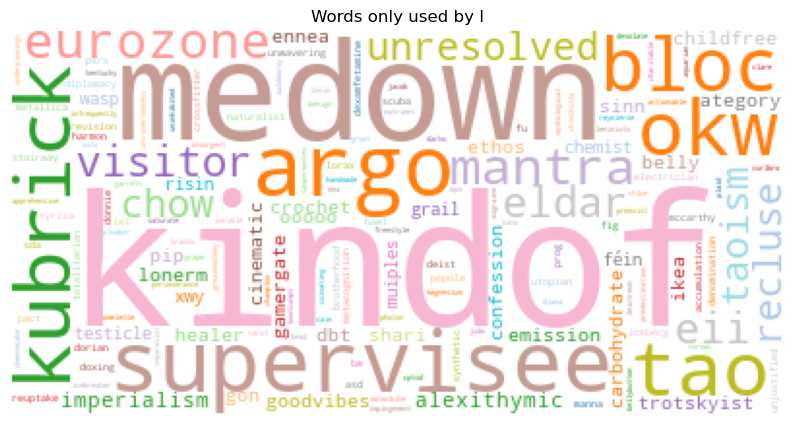

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(background_color='white',colormap='tab20').generate_from_frequencies(only_i_count))
plt.title('Words only used by I')
plt.axis('off')
plt.show()

In [38]:
only_e=set(e_dict.keys())-set(i_dict.keys())

len(only_i)

10228

In [39]:
only_e_count={}
for word in only_e:
  only_e_count[word]=e_dict[word]

only_e_count=Counter(only_e_count)
only_e_count.most_common(100)

[('det', 666),
 ('ikke', 362),
 ('jeg', 263),
 ('på', 238),
 ('har', 208),
 ('så', 190),
 ('kan', 172),
 ('være', 96),
 ('hvis', 95),
 ('eller', 78),
 ('var', 75),
 ('vil', 74),
 ('også', 74),
 ('skal', 68),
 ('fra', 67),
 ('godt', 59),
 ('ved', 59),
 ('meget', 55),
 ('nok', 50),
 ('lidt', 49),
 ('hvad', 48),
 ('selv', 48),
 ('kunne', 48),
 ('gør', 47),
 ('ville', 45),
 ('noget', 43),
 ('mange', 43),
 ('ting', 41),
 ('lige', 41),
 ('ret', 40),
 ('deres', 40),
 ('mig', 36),
 ('få', 36),
 ('hvor', 35),
 ('fordi', 34),
 ('topps', 33),
 ('skulle', 32),
 ('tror', 32),
 ('alle', 31),
 ('får', 31),
 ('havde', 30),
 ('jabberwacky', 29),
 ('samme', 28),
 ('mennesker', 28),
 ('kun', 28),
 ('und', 27),
 ('sådan', 27),
 ('siger', 27),
 ('derudover', 25),
 ('når', 25),
 ('afd', 25),
 ('bliver', 24),
 ('kommer', 24),
 ('hvorfor', 23),
 ('kalo', 23),
 ('nogen', 23),
 ('nogle', 22),
 ('blot', 22),
 ('flere', 22),
 ('tage', 22),
 ('hvordan', 22),
 ('går', 21),
 ('blev', 21),
 ('artiklen', 21),
 ('westp

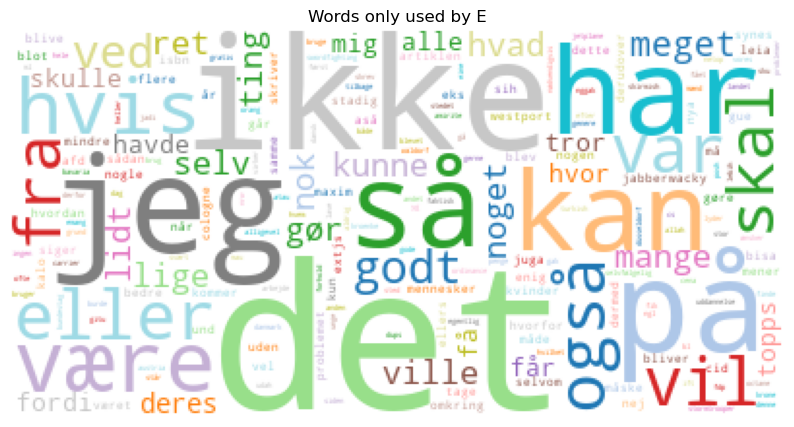

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(background_color='white',colormap='tab20').generate_from_frequencies(only_e_count))
plt.title('Words only used by E')
plt.axis('off')
plt.show()